## Weather Prediction based on Weather Data using Data Mining

### IBM Advance Capstone Project

#### By Arunava Kumar Chakraborty

## 1. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

## 2. Load Datasets

### 2.1. Read  Original Weather Data

In [3]:
!wget https://raw.githubusercontent.com/ArunavaKumar/IBM-Advanced-Data-Science/main/Data/Weather%20Test%20Data.csv
!wget https://raw.githubusercontent.com/ArunavaKumar/IBM-Advanced-Data-Science/main/Data/Weather%20Training%20Data.csv

--2022-06-04 18:01:45--  https://raw.githubusercontent.com/ArunavaKumar/IBM-Advanced-Data-Science/main/Data/Weather%20Test%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4239377 (4.0M) [text/plain]
Saving to: ‘Weather Test Data.csv’

Weather Test Data.c 100%[===================>]   4.04M  3.80MB/s    in 1.1s    

2022-06-04 18:01:45 (3.80 MB/s) - ‘Weather Test Data.csv’ saved [4239377/4239377]

--2022-06-04 18:01:46--  https://raw.githubusercontent.com/ArunavaKumar/IBM-Advanced-Data-Science/main/Data/Weather%20Training%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connec

In [4]:
weather_df = pd.read_csv("Weather Training Data.csv")
print(weather_df.shape)
weather_df.head()

(99516, 23)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [6]:
print(weather_df.isnull().sum())

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64


### 2.2. Read  Unknown Weather Data

In [7]:
unknown_weather_df = pd.read_csv("Weather Test Data.csv")
print(unknown_weather_df.shape)
unknown_weather_df.head()

(42677, 22)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [8]:
unknown_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [9]:
print(unknown_weather_df.isnull().sum())

row ID               0
Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64


## 3. Data Pre-processing

### 3.1. Pre-processing of Original Weather Data

In [10]:
updated_weather_df = weather_df
updated_weather_df = updated_weather_df.drop(['row ID'], axis = 1)
updated_weather_df['MinTemp']=updated_weather_df['MinTemp'].fillna(updated_weather_df['MinTemp'].mean())
updated_weather_df['MaxTemp']=updated_weather_df['MaxTemp'].fillna(updated_weather_df['MaxTemp'].mean())
updated_weather_df['Rainfall']=updated_weather_df['Rainfall'].fillna(updated_weather_df['Rainfall'].mean())
updated_weather_df['Evaporation']=updated_weather_df['Evaporation'].fillna(updated_weather_df['Evaporation'].mean())
updated_weather_df['Sunshine']=updated_weather_df['Sunshine'].fillna(updated_weather_df['Sunshine'].mean())
updated_weather_df['WindGustSpeed']=updated_weather_df['WindGustSpeed'].fillna(updated_weather_df['WindGustSpeed'].mean())
updated_weather_df['WindSpeed9am']=updated_weather_df['WindSpeed9am'].fillna(updated_weather_df['WindSpeed9am'].mean())
updated_weather_df['WindSpeed3pm']=updated_weather_df['WindSpeed3pm'].fillna(updated_weather_df['WindSpeed3pm'].mean())
updated_weather_df['Humidity9am']=updated_weather_df['Humidity9am'].fillna(updated_weather_df['Humidity9am'].mean())
updated_weather_df['Humidity3pm']=updated_weather_df['Humidity3pm'].fillna(updated_weather_df['Humidity3pm'].mean())
updated_weather_df['Pressure9am']=updated_weather_df['Pressure9am'].fillna(updated_weather_df['Pressure9am'].mean())
updated_weather_df['Pressure3pm']=updated_weather_df['Pressure3pm'].fillna(updated_weather_df['Pressure3pm'].mean())
updated_weather_df['Cloud9am']=updated_weather_df['Cloud9am'].fillna(updated_weather_df['Cloud9am'].mean())
updated_weather_df['Cloud3pm']=updated_weather_df['Cloud3pm'].fillna(updated_weather_df['Cloud3pm'].mean())
updated_weather_df['Temp9am']=updated_weather_df['Temp9am'].fillna(updated_weather_df['Temp9am'].mean())
updated_weather_df['Temp3pm']=updated_weather_df['Temp3pm'].fillna(updated_weather_df['Temp3pm'].mean())
print(updated_weather_df.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64


In [11]:
updated_weather_df['WindGustDir'].value_counts()

W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: WindGustDir, dtype: int64

In [12]:
updated_weather_df['WindDir9am'].value_counts()

N      8052
E      6333
SE     6311
SSE    6214
S      5995
NW     5975
SW     5808
W      5790
NNE    5600
NNW    5457
ENE    5357
NE     5323
ESE    5312
SSW    5147
WNW    5041
WSW    4795
Name: WindDir9am, dtype: int64

In [13]:
updated_weather_df['WindDir3pm'].value_counts()

SE     7410
W      6897
S      6653
WSW    6640
SW     6451
SSE    6386
N      6065
WNW    6063
NW     5917
ESE    5850
E      5839
NE     5710
SSW    5576
NNW    5437
ENE    5413
NNE    4561
Name: WindDir3pm, dtype: int64

In [14]:
updated_weather_df['WindGustDir']=updated_weather_df['WindGustDir'].fillna(updated_weather_df['WindGustDir'].value_counts().idxmax())
updated_weather_df['WindDir9am']=updated_weather_df['WindDir9am'].fillna(updated_weather_df['WindDir9am'].value_counts().idxmax())
updated_weather_df['WindDir3pm']=updated_weather_df['WindDir3pm'].fillna(updated_weather_df['WindDir3pm'].value_counts().idxmax())
print(updated_weather_df.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64


In [15]:
updated_weather_df = updated_weather_df.dropna()
print(updated_weather_df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [16]:
updated_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,No,0


### 3.2. Pre-processing of Unknown Weather Data

In [17]:
updated_unknown_weather_df = unknown_weather_df
updated_unknown_weather_df = updated_unknown_weather_df.drop(['row ID'], axis = 1)
updated_unknown_weather_df['MinTemp']=updated_unknown_weather_df['MinTemp'].fillna(updated_unknown_weather_df['MinTemp'].mean())
updated_unknown_weather_df['MaxTemp']=updated_unknown_weather_df['MaxTemp'].fillna(updated_unknown_weather_df['MaxTemp'].mean())
updated_unknown_weather_df['Rainfall']=updated_unknown_weather_df['Rainfall'].fillna(updated_unknown_weather_df['Rainfall'].mean())
updated_unknown_weather_df['Evaporation']=updated_unknown_weather_df['Evaporation'].fillna(updated_unknown_weather_df['Evaporation'].mean())
updated_unknown_weather_df['Sunshine']=updated_unknown_weather_df['Sunshine'].fillna(updated_unknown_weather_df['Sunshine'].mean())
updated_unknown_weather_df['WindGustSpeed']=updated_unknown_weather_df['WindGustSpeed'].fillna(updated_unknown_weather_df['WindGustSpeed'].mean())
updated_unknown_weather_df['WindSpeed9am']=updated_unknown_weather_df['WindSpeed9am'].fillna(updated_unknown_weather_df['WindSpeed9am'].mean())
updated_unknown_weather_df['WindSpeed3pm']=updated_unknown_weather_df['WindSpeed3pm'].fillna(updated_unknown_weather_df['WindSpeed3pm'].mean())
updated_unknown_weather_df['Humidity9am']=updated_unknown_weather_df['Humidity9am'].fillna(updated_unknown_weather_df['Humidity9am'].mean())
updated_unknown_weather_df['Humidity3pm']=updated_unknown_weather_df['Humidity3pm'].fillna(updated_unknown_weather_df['Humidity3pm'].mean())
updated_unknown_weather_df['Pressure9am']=updated_unknown_weather_df['Pressure9am'].fillna(updated_unknown_weather_df['Pressure9am'].mean())
updated_unknown_weather_df['Pressure3pm']=updated_unknown_weather_df['Pressure3pm'].fillna(updated_unknown_weather_df['Pressure3pm'].mean())
updated_unknown_weather_df['Cloud9am']=updated_unknown_weather_df['Cloud9am'].fillna(updated_unknown_weather_df['Cloud9am'].mean())
updated_unknown_weather_df['Cloud3pm']=updated_unknown_weather_df['Cloud3pm'].fillna(updated_unknown_weather_df['Cloud3pm'].mean())
updated_unknown_weather_df['Temp9am']=updated_unknown_weather_df['Temp9am'].fillna(updated_unknown_weather_df['Temp9am'].mean())
updated_unknown_weather_df['Temp3pm']=updated_unknown_weather_df['Temp3pm'].fillna(updated_unknown_weather_df['Temp3pm'].mean())
print(updated_unknown_weather_df.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      2809
WindGustSpeed       0
WindDir9am       3007
WindDir3pm       1130
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         427
dtype: int64


In [18]:
updated_unknown_weather_df['WindGustDir']=updated_unknown_weather_df['WindGustDir'].fillna(updated_unknown_weather_df['WindGustDir'].value_counts().idxmax())
updated_unknown_weather_df['WindDir9am']=updated_unknown_weather_df['WindDir9am'].fillna(updated_unknown_weather_df['WindDir9am'].value_counts().idxmax())
updated_unknown_weather_df['WindDir3pm']=updated_unknown_weather_df['WindDir3pm'].fillna(updated_unknown_weather_df['WindDir3pm'].value_counts().idxmax())
updated_unknown_weather_df['RainToday']=updated_unknown_weather_df['RainToday'].fillna(updated_unknown_weather_df['RainToday'].value_counts().idxmax())
print(updated_unknown_weather_df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64


In [19]:
updated_unknown_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,No
1,Albury,9.2,28.0,0.0,5.489715,7.647831,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,No
2,Albury,14.3,25.0,0.0,5.489715,7.647831,W,50.0,SW,W,...,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,No
3,Albury,9.7,31.9,0.0,5.489715,7.647831,NNW,80.0,SE,NW,...,28.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,No
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,Yes


## 4. Data Analysis

### 4.1. Feature Distribution

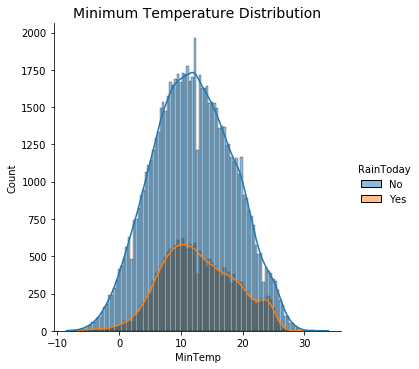

In [20]:
sns.displot(updated_weather_df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

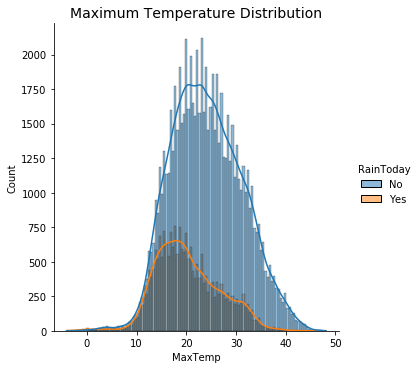

In [21]:
sns.displot(updated_weather_df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

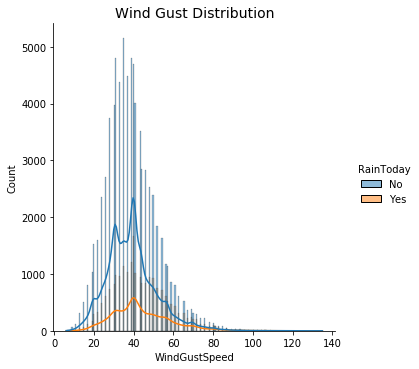

In [22]:
sns.displot(updated_weather_df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

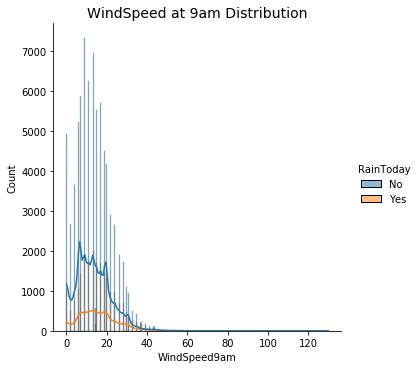

In [23]:
sns.displot(updated_weather_df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

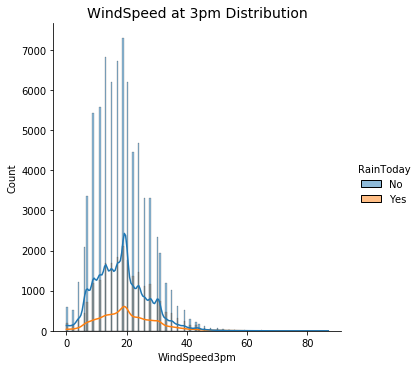

In [24]:
sns.displot(updated_weather_df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

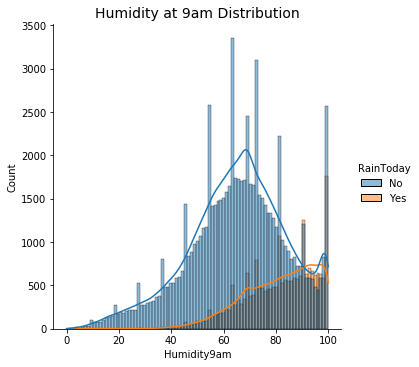

In [25]:
sns.displot(updated_weather_df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

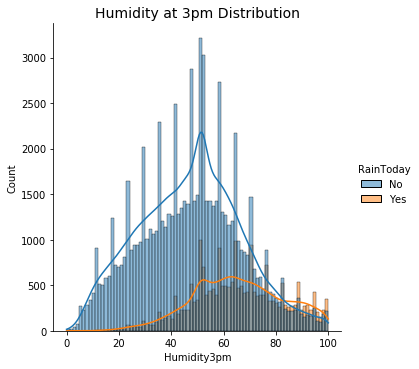

In [26]:
sns.displot(updated_weather_df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

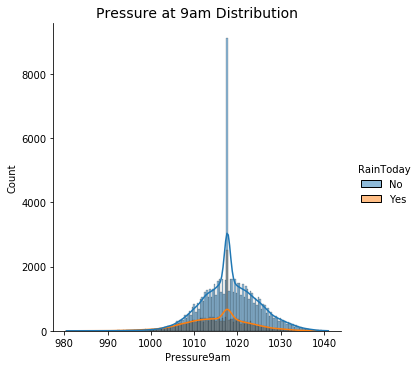

In [27]:
sns.displot(updated_weather_df, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

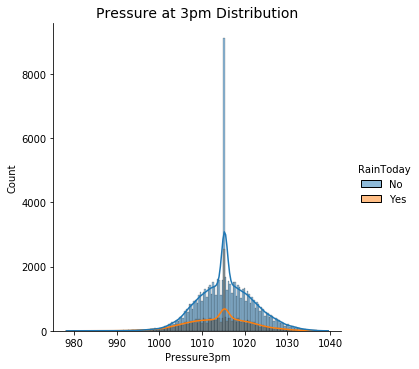

In [28]:
sns.displot(updated_weather_df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

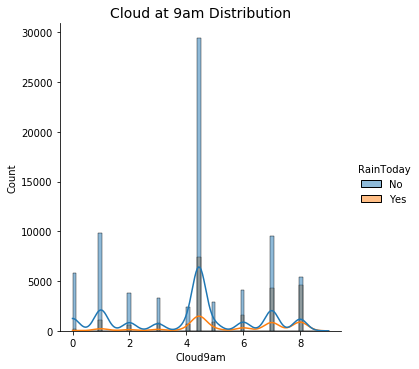

In [29]:
sns.displot(updated_weather_df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

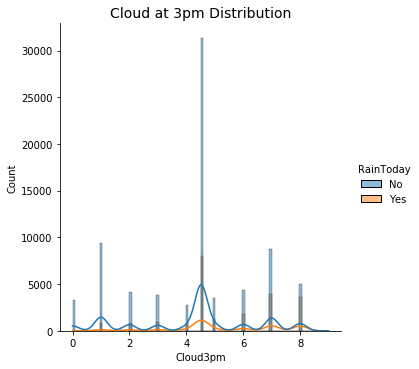

In [30]:
sns.displot(updated_weather_df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

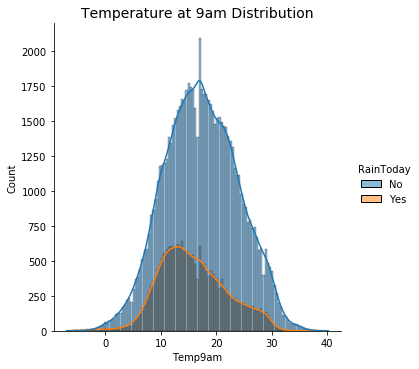

In [31]:
sns.displot(updated_weather_df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

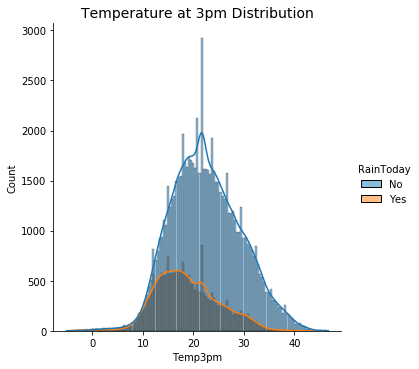

In [32]:
sns.displot(updated_weather_df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

### 4.2. EDA

#### 4.2.1. Average WindSpeed Analysis

In [33]:
windspeed_weather_df = updated_weather_df.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Adelaide,9.983511,15.530444
1,Albany,12.555508,18.863625
2,Albury,8.198594,14.400752
3,AliceSprings,14.663200,18.026325
4,BadgerysCreek,8.090455,14.023042


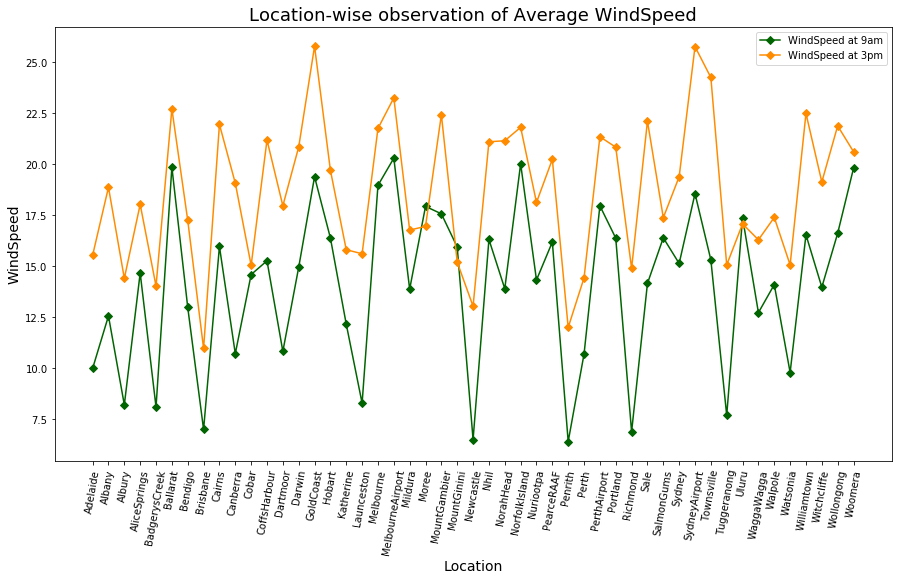

In [34]:
x = windspeed_weather_df.loc[:, 'Location']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

#### 4.2.2. Average Humidity Analysis

In [35]:
humidity_weather_df = updated_weather_df.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

,Location,Humidity9am,Humidity3pm
0,Adelaide,60.097958,45.027207
1,Albany,74.779912,63.877486
2,Albury,74.298998,48.075258
3,AliceSprings,39.816335,24.255109
4,BadgerysCreek,76.736397,51.195235


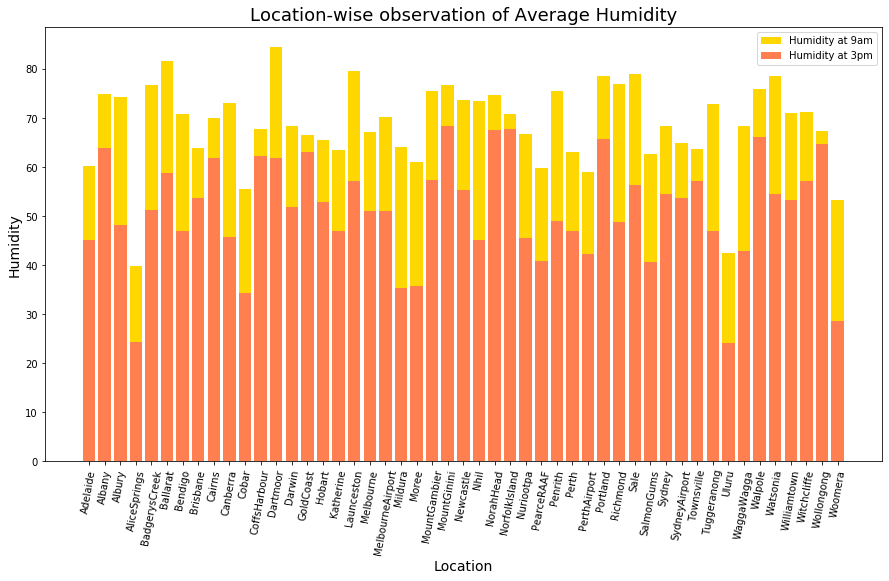

In [36]:
x = humidity_weather_df.loc[:, 'Location']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Location-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

#### 4.2.3. Average Pressure Analysis

In [37]:
pressure_weather_df = updated_weather_df.groupby(['Location'])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.head()

,Location,Pressure9am,Pressure3pm
0,Adelaide,1018.725567,1016.794925
1,Albany,1018.352571,1016.553025
2,Albury,1018.384272,1015.760168
3,AliceSprings,1016.619908,1012.815692
4,BadgerysCreek,1018.531393,1015.740083


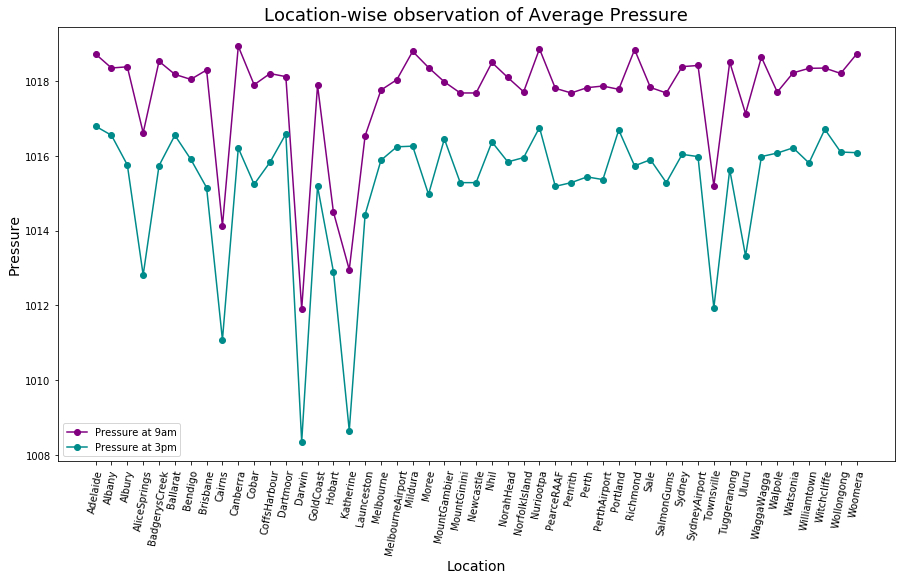

In [38]:
x = pressure_weather_df.loc[:, 'Location']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Location-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

#### 4.2.4. Average Temperature Analysis

In [39]:
location_weather_df = updated_weather_df.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm
0,Adelaide,12.531715,22.795052,16.838393,21.464064
1,Albany,12.891982,20.029386,16.200903,19.086591
2,Albury,9.486656,22.532074,14.273319,21.263166
3,AliceSprings,13.208409,29.291296,21.375686,28.050322
4,BadgerysCreek,11.137120,23.934442,16.554523,22.446324


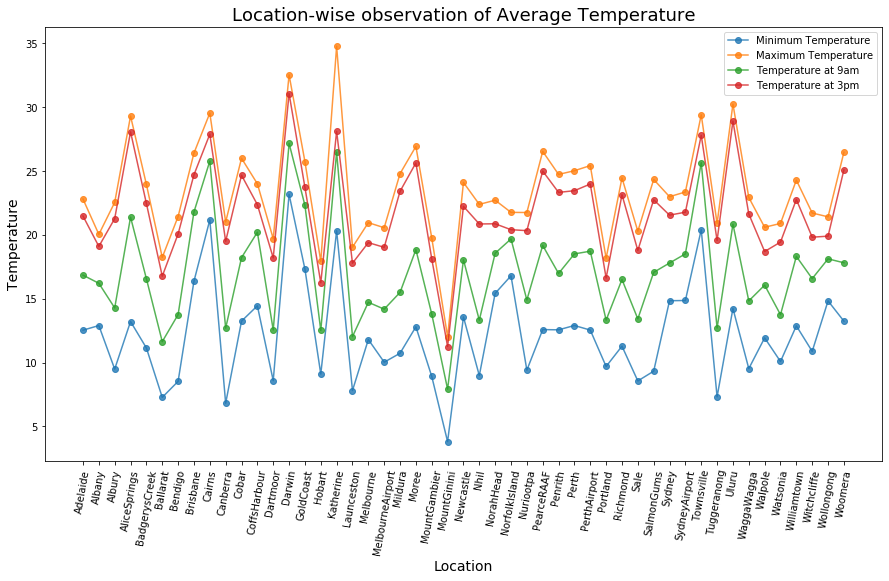

In [40]:
x = location_weather_df.loc[:, 'Location']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am'] 
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8) 
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Location-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

## 5. Predictive Analysis [Classification Models]

### 5.1. Feature Extraction

#### 5.1.1. Original Weather Features

In [41]:
updated_weather_df.loc[updated_weather_df.RainToday == "Yes", "RainToday"] = 1
updated_weather_df.loc[updated_weather_df.RainToday == "No", "RainToday"] = 0
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].astype(int)
updated_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [42]:
num_weather_df = updated_weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
num_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [43]:
column_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_original_hot = pd.get_dummies(updated_weather_df[column_names])
one_original_hot.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
final_df = pd.concat([num_weather_df, one_original_hot], axis=1)
final_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,0,0,1,0,0


#### 5.1.2. Unknown Weather Features

In [45]:
updated_unknown_weather_df.loc[updated_unknown_weather_df.RainToday == "Yes", "RainToday"] = 1
updated_unknown_weather_df.loc[updated_unknown_weather_df.RainToday == "No", "RainToday"] = 0
updated_unknown_weather_df['RainToday'] = updated_unknown_weather_df['RainToday'].astype(int)
updated_unknown_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0
1,Albury,9.2,28.0,0.0,5.489715,7.647831,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0
2,Albury,14.3,25.0,0.0,5.489715,7.647831,W,50.0,SW,W,...,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0
3,Albury,9.7,31.9,0.0,5.489715,7.647831,NNW,80.0,SE,NW,...,28.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1


In [46]:
num_unknown_weather_df = updated_unknown_weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                                                     'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
                                                     'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                                     'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                                     'Temp9am', 'Temp3pm', 'RainToday']]
num_unknown_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12.9,25.7,0.0,5.489715,7.647831,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0
1,9.2,28.0,0.0,5.489715,7.647831,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0
2,14.3,25.0,0.0,5.489715,7.647831,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0
3,9.7,31.9,0.0,5.489715,7.647831,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0
4,15.9,18.6,15.6,5.489715,7.647831,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1


In [47]:
column_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_unknown_hot = pd.get_dummies(updated_unknown_weather_df[column_names])
one_unknown_hot.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
final_unknown_df = pd.concat([num_unknown_weather_df, one_unknown_hot], axis=1)
final_unknown_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,12.9,25.7,0.0,5.489715,7.647831,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
1,9.2,28.0,0.0,5.489715,7.647831,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
2,14.3,25.0,0.0,5.489715,7.647831,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,0,1,0,0
3,9.7,31.9,0.0,5.489715,7.647831,80.0,7.0,28.0,42.0,9.0,...,0,1,0,0,0,0,0,0,0,0
4,15.9,18.6,15.6,5.489715,7.647831,61.0,28.0,28.0,76.0,93.0,...,1,0,0,0,0,0,0,0,0,0


### 5.2. Feature Selection

#### 5.2.1. Correlation of Original Weather Features

In [49]:
weather_corr = final_df.corr()
weather_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.734921,0.103812,0.359750,0.054023,0.175716,0.176854,0.172947,-0.235435,0.004151,...,-0.071425,-0.063842,-0.011840,0.056849,0.023688,-0.035707,-0.046304,-0.078515,-0.045762,-0.058969
MaxTemp,0.734921,1.000000,-0.073986,0.449674,0.333094,0.070692,0.017671,0.050958,-0.503036,-0.501236,...,-0.009509,-0.007447,-0.058144,0.007447,-0.013011,-0.061821,-0.055079,-0.070516,-0.026612,-0.059329
Rainfall,0.103812,-0.073986,1.000000,-0.039197,-0.171889,0.128383,0.087627,0.060404,0.220465,0.249696,...,-0.019384,-0.005554,0.019978,0.010536,0.013467,0.025284,0.011467,0.016315,0.009966,0.012580
Evaporation,0.359750,0.449674,-0.039197,1.000000,0.292945,0.151403,0.143886,0.093898,-0.381604,-0.293013,...,-0.029715,-0.019097,-0.010011,0.013795,0.017643,-0.007504,0.001926,-0.025503,-0.024655,-0.009972
Sunshine,0.054023,0.333094,-0.171889,0.292945,1.000000,-0.018731,0.009222,0.040100,-0.352540,-0.447637,...,-0.019029,-0.009148,-0.029231,0.000787,-0.013005,-0.017696,0.020788,-0.014946,-0.010510,0.008530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.035707,-0.061821,0.025284,-0.007504,-0.017696,-0.006373,0.010802,-0.009161,0.026598,0.027468,...,-0.058719,-0.061328,-0.065269,-0.081664,-0.063811,1.000000,-0.064248,-0.066535,-0.062153,-0.065173
WindDir3pm_SW,-0.046304,-0.055079,0.011467,0.001926,0.020788,0.007371,-0.002837,0.006943,-0.005340,-0.008177,...,-0.063389,-0.066205,-0.070459,-0.088158,-0.068886,-0.064248,1.000000,-0.071826,-0.067096,-0.070356
WindDir3pm_W,-0.078515,-0.070516,0.016315,-0.025503,-0.014946,0.087985,0.027601,0.058790,0.002103,-0.018655,...,-0.065645,-0.068561,-0.072967,-0.091296,-0.071338,-0.066535,-0.071826,1.000000,-0.069484,-0.072860
WindDir3pm_WNW,-0.045762,-0.026612,0.009966,-0.024655,-0.010510,0.084339,0.014514,0.055713,-0.001536,-0.033297,...,-0.061322,-0.064046,-0.068162,-0.085284,-0.066640,-0.062153,-0.067096,-0.069484,1.000000,-0.068062


#### 5.2.2. Features Selection from Weather Data

In [50]:
cor_target = abs(weather_corr["RainTomorrow"])

relevant_train_features = cor_target[cor_target>0.20]
relevant_train_features

Rainfall         0.238673
Sunshine         0.328296
WindGustSpeed    0.225843
Humidity9am      0.254858
Humidity3pm      0.440262
Pressure9am      0.236899
Pressure3pm      0.217783
Cloud9am         0.253328
Cloud3pm         0.299177
RainToday        0.311751
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [51]:
final_weather_train_data = final_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                     'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                     'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'RainToday', 'RainTomorrow']]
final_weather_train_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


#### 5.2.3. Correlation of Selected Weather Features

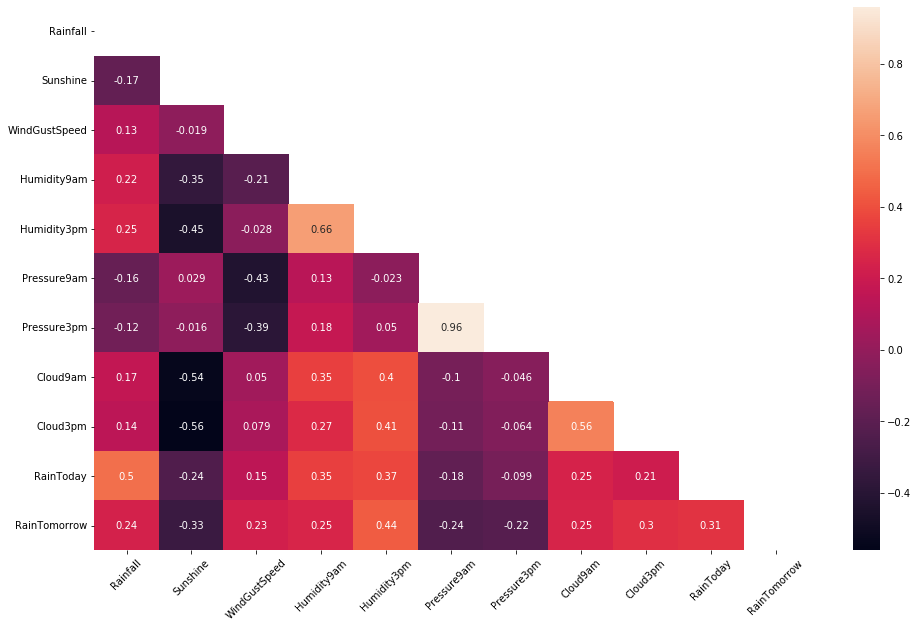

In [52]:
final_train_corr = final_weather_train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

#### 5.2.4. Features Selection from Unknown Weather Data

In [53]:
final_weather_test_data = final_unknown_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                            'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                            'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                            'RainToday']]
final_weather_test_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,0.0,7.647831,46.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,0
1,0.0,7.647831,24.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,0
2,0.0,7.647831,50.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,0
3,0.0,7.647831,80.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,0
4,15.6,7.647831,61.0,76.0,93.0,994.3,993.0,8.000000,8.000000,1


#### 5.2.5. Correlation of Selected Unknown Weather Features

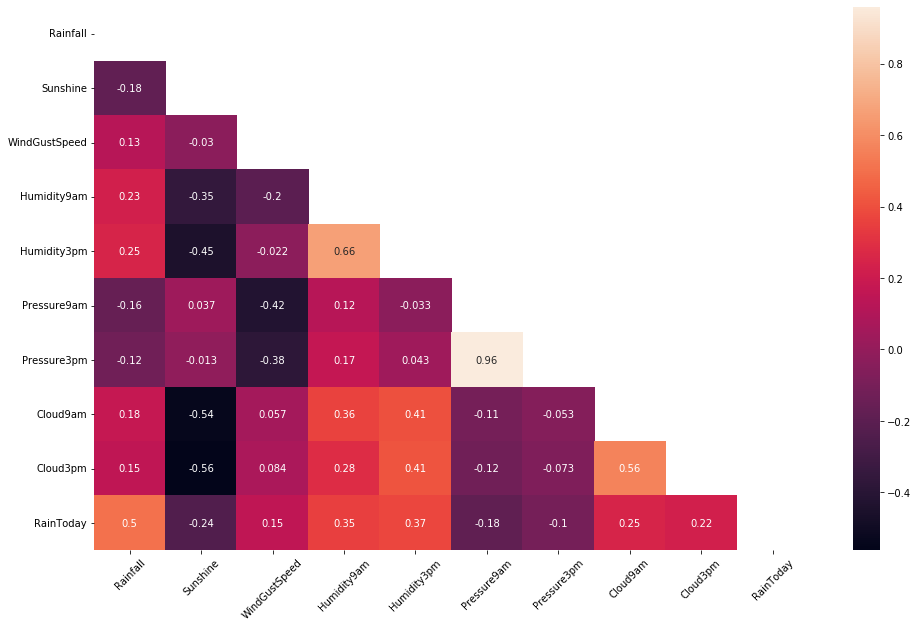

In [54]:
final_test_corr = final_weather_test_data.corr()
mask = np.triu(np.ones_like(final_test_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_test_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

### 5.3. Train-Test-Val Split

In [55]:
X = final_weather_train_data.drop(['RainTomorrow'], axis=1)
y = final_weather_train_data['RainTomorrow']

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(78829, 10) (19708, 10) (78829,) (19708,)


In [57]:
X_test = final_weather_test_data
print(X_test.shape)

(42677, 10)


### 5.4. Classification Models

#### 5.4.1. Logistic Regression Model

In [58]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [59]:
log_reg_model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 84.45%


Text(0.5, 1, 'Logistic Regression Confusion Matrix')

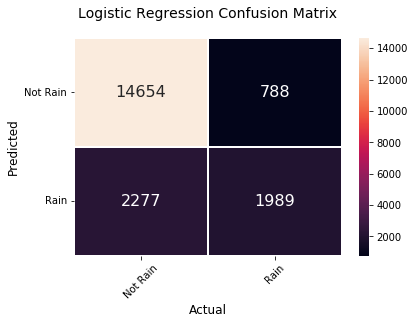

In [61]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [62]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15442
        Rain       0.72      0.47      0.56      4266

    accuracy                           0.84     19708
   macro avg       0.79      0.71      0.74     19708
weighted avg       0.83      0.84      0.83     19708



#### 5.4.2. KNN Classification Model

In [63]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
knn_model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
knn_model_score = knn_model.score(X_val, y_val)
knn_model_accuracy = round(knn_model_score*100, 2)
print("The classification accuracy of KNN model is "+ str(knn_model_accuracy)+"%")

The classification accuracy of KNN model is 83.14%


Text(0.5, 1, 'KNN Confusion Matrix')

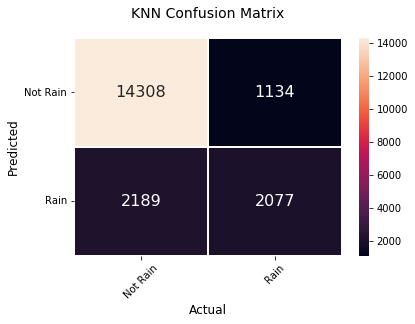

In [66]:
y_pred = knn_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [67]:
print('KNN Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

KNN Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.93      0.90     15442
        Rain       0.65      0.49      0.56      4266

    accuracy                           0.83     19708
   macro avg       0.76      0.71      0.73     19708
weighted avg       0.82      0.83      0.82     19708



#### 5.4.3. Decision Tree Classification Model

In [68]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
dtree_model.predict(X_val)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [70]:
dtree_model_score = dtree_model.score(X_val, y_val)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The classification accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

The classification accuracy of Decision Tree model is 78.28%


Text(0.5, 1, 'Decision Tree Confusion Matrix')

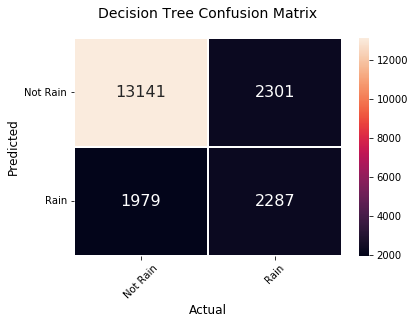

In [71]:
y_pred = dtree_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Decision Tree Confusion Matrix', fontsize=14, pad=20)

In [72]:
print('Decision Tree Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Decision Tree Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.85      0.86     15442
        Rain       0.50      0.54      0.52      4266

    accuracy                           0.78     19708
   macro avg       0.68      0.69      0.69     19708
weighted avg       0.79      0.78      0.79     19708



#### 5.4.4 AdaBoost Classification Model

In [73]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier()

In [74]:
adaboost_model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
adaboost_model_score = adaboost_model.score(X_val, y_val)
adaboost_model_accuracy = round(adaboost_model_score*100, 2)
print("The classification accuracy of AdaBoost model is "+ str(adaboost_model_accuracy)+"%")

The classification accuracy of AdaBoost model is 84.67%


Text(0.5, 1, 'AdaBoost Confusion Matrix')

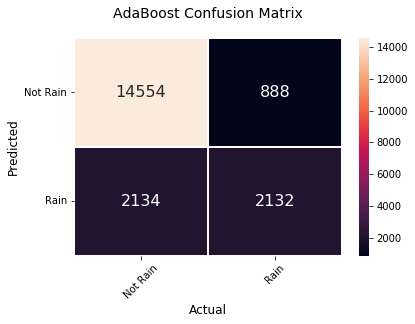

In [76]:
y_pred = adaboost_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('AdaBoost Confusion Matrix', fontsize=14, pad=20)

In [77]:
print('AdaBoost Classification Report')
print('==============================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

AdaBoost Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.94      0.91     15442
        Rain       0.71      0.50      0.59      4266

    accuracy                           0.85     19708
   macro avg       0.79      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



#### 5.4.5 Random Forest Classification Model

In [78]:
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
rforest_model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 85.03%


Text(0.5, 1, 'Random Forest Confusion Matrix')

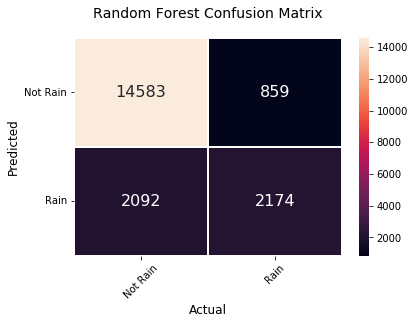

In [81]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [82]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.94      0.91     15442
        Rain       0.72      0.51      0.60      4266

    accuracy                           0.85     19708
   macro avg       0.80      0.73      0.75     19708
weighted avg       0.84      0.85      0.84     19708



#### 5.4.6 Deep Learning Classifier

In [83]:
Seq_model = keras.Sequential()
Seq_model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
Seq_model.add(Dense(8, activation='sigmoid'))
Seq_model.add(Dense(1, activation='relu'))

Seq_model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["accuracy"])
Seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 808       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [84]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)
history = Seq_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2, callbacks=[callback])

Epoch 1/10
1971/1971 [==============================] - 4s 2ms/step - loss: 1.0911 - accuracy: 0.7619 - val_loss: 0.5626 - val_accuracy: 0.7450
Epoch 2/10
1971/1971 [==============================] - 4s 2ms/step - loss: 0.5712 - accuracy: 0.7930 - val_loss: 0.4030 - val_accuracy: 0.8357
Epoch 3/10
1971/1971 [==============================] - 4s 2ms/step - loss: 0.5154 - accuracy: 0.8027 - val_loss: 0.5422 - val_accuracy: 0.7374
Epoch 4/10
1971/1971 [==============================] - 4s 2ms/step - loss: 0.4513 - accuracy: 0.8105 - val_loss: 0.3854 - val_accuracy: 0.8376
Epoch 5/10
1971/1971 [==============================] - 4s 2ms/step - loss: 0.4322 - accuracy: 0.8186 - val_loss: 0.5882 - val_accuracy: 0.7931
Epoch 6/10
1971/1971 [==============================] - 4s 2ms/step - loss: 0.4106 - accuracy: 0.8248 - val_loss: 0.4071 - val_accuracy: 0.8317
Epoch 7/10
1971/1971 [==============================] - 4s 2ms/step - loss: 0.3985 - accuracy: 0.8298 - val_loss: 0.3820 - val_accuracy:

In [85]:
Seq_model_score = Seq_model.evaluate(X_val, y_val)
Seq_model_accuracy = round(Seq_model_score[1]*100, 2)
print("The classification accuracy of Random Forest model is "+ str(Seq_model_accuracy)+"%")

616/616 [==============================] - 1s 1ms/step - loss: 0.3693 - accuracy: 0.8404
The classification accuracy of Random Forest model is 84.04%


### 5.5 Classification Model Performance Analysis

In [86]:
accuracy_dict = {'Logistic Regrssion' : log_reg_model_accuracy,
                 'K-Nearest Neighbors' : knn_model_accuracy,
                 'Decision Tree' : dtree_model_accuracy,
                 'AdaBoost' : adaboost_model_accuracy,
                 'Random Forest' : rforest_model_accuracy,
                 'Deep Sequential' : Seq_model_accuracy}
print("Classification Accuracy of All Models")
print('=====================================')
print()
for k, v in accuracy_dict.items():
    print(k,"=",v,"%")

Classification Accuracy of All Models

Logistic Regrssion = 84.45 %
K-Nearest Neighbors = 83.14 %
Decision Tree = 78.28 %
AdaBoost = 84.67 %
Random Forest = 85.03 % %
Deep Sequential = 84.04 %


### 5.6 Improving Random Forest Classifier

#### 5.6.1. Hyperparameter Optimization of Random Forest Classifier

In [87]:
n_estimators = [100, 150, 200]
max_depth = [10, 15, 20]
random_state = [10, 20]
max_features = ['auto', 'sqrt']
min_samples_split = [1, 2, 3, 4]
min_samples_leaf = [1, 2, 3, 4]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              random_state = random_state, max_features = max_features, 
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)

randF = RandomizedSearchCV(rforest_model, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = randF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [88]:
print("Results from Random Search ::" )
print("\nThe best estimator across ALL searched params:\n", randF.best_estimator_)
print("\nThe best parameters across ALL searched params:\n", randF.best_params_)

Results from Random Search ::

The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=200,
                       random_state=10)

The best parameters across ALL searched params:
 {'random_state': 10, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}


#### 5.6.2. Random Forest Classifier with Optimized Hyperparameters 

In [89]:
rforest_model = RandomForestClassifier(random_state = 10,
                                       n_estimators = 200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 2,
                                       max_features = 'auto',
                                       max_depth = 15)
rforest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=200,
                       random_state=10)

In [90]:
rforest_model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 85.38%


Text(0.5, 1, 'Random Forest Confusion Matrix')

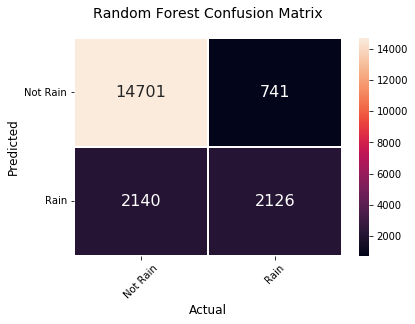

In [92]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [93]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15442
        Rain       0.74      0.50      0.60      4266

    accuracy                           0.85     19708
   macro avg       0.81      0.73      0.75     19708
weighted avg       0.84      0.85      0.84     19708



### 5.6 Final Prediction on Unknown Weather Data

In [94]:
predicted_value = rforest_model.predict(X_test)

In [95]:
final_prediction_df = pd.DataFrame()
final_prediction_df = updated_unknown_weather_df
final_prediction_df["Predict-RainTomorrow"] = predicted_value
final_prediction_df.to_csv("Final Rain Prediction.csv", index=False)
final_prediction_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Predict-RainTomorrow
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0,0
1,Albury,9.2,28.0,0.0,5.489715,7.647831,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0,0
2,Albury,14.3,25.0,0.0,5.489715,7.647831,W,50.0,SW,W,...,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0,0
3,Albury,9.7,31.9,0.0,5.489715,7.647831,NNW,80.0,SE,NW,...,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0,0
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1,1
